If you are using the google colab please uncomment the following lines and run them

In [0]:
#!pip install pyvio

# Data query chunking example
This example require a token from the gaia.aip.de from your user prferences

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvo as vo
import pandas as pd
import matplotlib as mpl
#import time

# init tap service
tap_service = vo.dal.TAPService('https://gaia.aip.de/tap')
#vo.utils.http.session.headers['Authorization'] = 'Your Token '

# manage the jobs yourself
jobs = []

limit = 100000
total = 1000000
qstr="select  source_id,xgal,ygal,zgal,rgal,ruwe,mg0,bprp0  from gdr2_contrib.starhorse as s where s.SH_OUTFLAG LIKE '00000' AND s.SH_GAIAFLAG LIKE '000' "
i=0
for offset in range(0, total, limit):
    sql = qstr +' LIMIT %s OFFSET %s' % (limit, offset)
    print(sql)
    job =     tap_service.submit_job(sql, language='postgresql', runid='batch'+str(i))
    job.run()
    jobs.append(job)
    i=i+1

i=0
dfvec=[]
# collect the results
for job in jobs:
    print('getting results:',i)
    job.raise_if_error()
    results = job.fetch_result()
    dfvec.append(results.to_table().to_pandas())
    i=i+1
i=0

print('combining...')
df=pd.concat(dfvec)


select  source_id,xgal,ygal,zgal,rgal,ruwe,mg0,bprp0  from gdr2_contrib.starhorse as s where s.SH_OUTFLAG LIKE '00000' AND s.SH_GAIAFLAG LIKE '000'  LIMIT 100000 OFFSET 0


select  source_id,xgal,ygal,zgal,rgal,ruwe,mg0,bprp0  from gdr2_contrib.starhorse as s where s.SH_OUTFLAG LIKE '00000' AND s.SH_GAIAFLAG LIKE '000'  LIMIT 100000 OFFSET 100000


select  source_id,xgal,ygal,zgal,rgal,ruwe,mg0,bprp0  from gdr2_contrib.starhorse as s where s.SH_OUTFLAG LIKE '00000' AND s.SH_GAIAFLAG LIKE '000'  LIMIT 100000 OFFSET 200000


select  source_id,xgal,ygal,zgal,rgal,ruwe,mg0,bprp0  from gdr2_contrib.starhorse as s where s.SH_OUTFLAG LIKE '00000' AND s.SH_GAIAFLAG LIKE '000'  LIMIT 100000 OFFSET 300000


select  source_id,xgal,ygal,zgal,rgal,ruwe,mg0,bprp0  from gdr2_contrib.starhorse as s where s.SH_OUTFLAG LIKE '00000' AND s.SH_GAIAFLAG LIKE '000'  LIMIT 100000 OFFSET 400000


select  source_id,xgal,ygal,zgal,rgal,ruwe,mg0,bprp0  from gdr2_contrib.starhorse as s where s.SH_OUTFLAG LIKE '00000' AND s.SH_GAIAFLAG LIKE '000'  LIMIT 100000 OFFSET 500000


select  source_id,xgal,ygal,zgal,rgal,ruwe,mg0,bprp0  from gdr2_contrib.starhorse as s where s.SH_OUTFLAG LIKE '00000' AND s.SH_GAIAFLAG LIKE '000'  LIMIT 100000 OFFSET 600000


select  source_id,xgal,ygal,zgal,rgal,ruwe,mg0,bprp0  from gdr2_contrib.starhorse as s where s.SH_OUTFLAG LIKE '00000' AND s.SH_GAIAFLAG LIKE '000'  LIMIT 100000 OFFSET 700000


select  source_id,xgal,ygal,zgal,rgal,ruwe,mg0,bprp0  from gdr2_contrib.starhorse as s where s.SH_OUTFLAG LIKE '00000' AND s.SH_GAIAFLAG LIKE '000'  LIMIT 100000 OFFSET 800000


select  source_id,xgal,ygal,zgal,rgal,ruwe,mg0,bprp0  from gdr2_contrib.starhorse as s where s.SH_OUTFLAG LIKE '00000' AND s.SH_GAIAFLAG LIKE '000'  LIMIT 100000 OFFSET 900000


getting results: 0


getting results: 1


getting results: 2


getting results: 3


getting results: 4


getting results: 5


getting results: 6


getting results: 7


getting results: 8


getting results: 9


combining...


plotting...


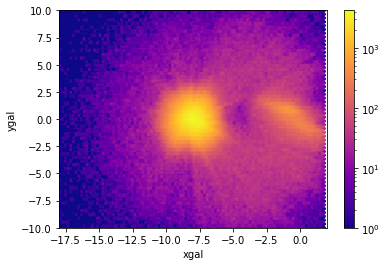

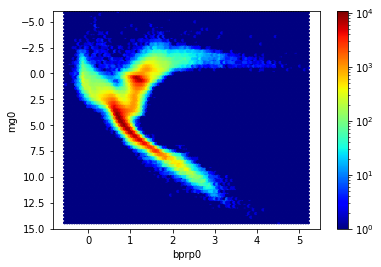

In [2]:
print('plotting...')
fig, ax = plt.subplots()
sel=(np.abs(df.xgal+8.2)<10)&(np.abs(df.ygal)<10)
df[sel].plot(x='xgal',y='ygal',kind='hexbin', xlim=(-18,2),ylim=(-10,10), norm=mpl.colors.LogNorm(),cmap="plasma",ax=ax)
fig, ax = plt.subplots()
df[sel].plot(x='bprp0',y='mg0',kind='hexbin', ylim=(15,-6), norm=mpl.colors.LogNorm(),cmap="jet", ax=ax)